<a href="https://www.kaggle.com/code/premkumarganji/car-price-multivariate-linear-regression?scriptVersionId=198761160" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
print(df.shape)
df.info()

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

In [5]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

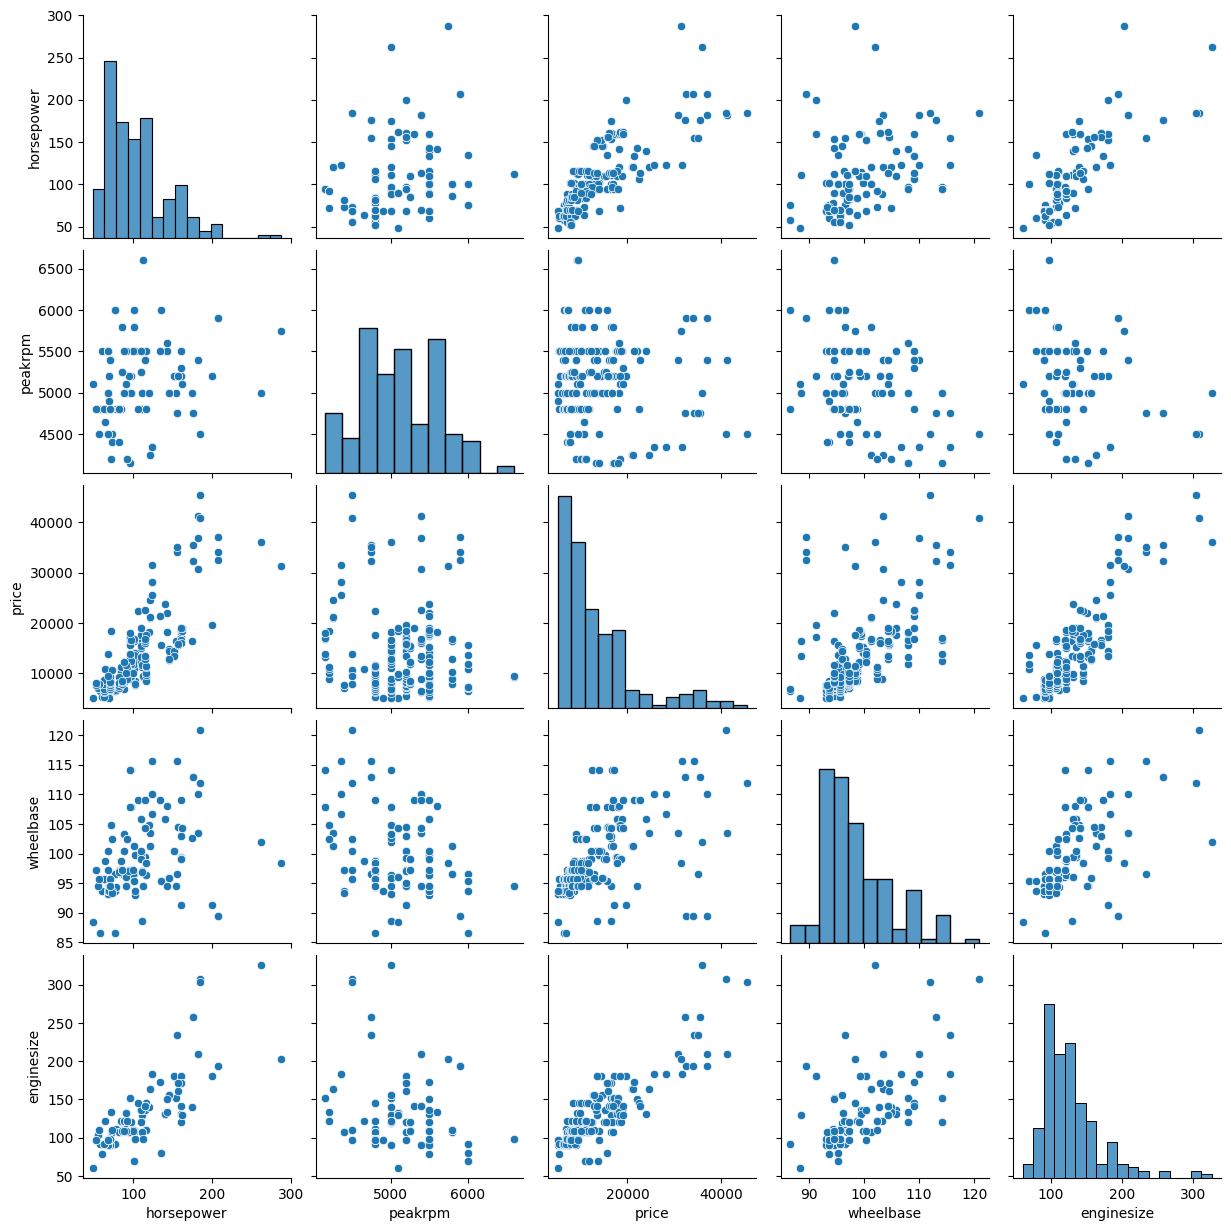

In [6]:
# Plot Non Categorical Data
sns.pairplot(df[['doornumber', 'horsepower', 'enginelocation', 'drivewheel', 'enginetype',
                'peakrpm', 'price', 'wheelbase', 'enginesize']])
plt.show()

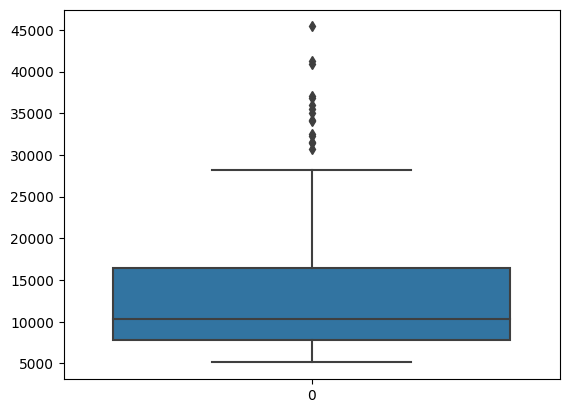

In [7]:
sns.boxplot(df['price'])
plt.show()

In [8]:
df['price'].quantile(0.99)

40802.72000000003

In [9]:
# Check any 0's in price
(df['price'] == 0.0).sum()

0

We can ignore outliers removal because there is very low difference between each percentile

In [10]:
#df = df[(df.price < df.price.quantile(0.99))]
#df.shape

In [11]:
final_df = df[['horsepower', 'enginesize', 'wheelbase', 'price']]

In [12]:
final_df.describe()

,horsepower,enginesize,wheelbase,price
count,205.000000,205.000000,205.000000,205.000000
mean,104.117073,126.907317,98.756585,13276.710571
std,39.544167,41.642693,6.021776,7988.852332
min,48.000000,61.000000,86.600000,5118.000000
25%,70.000000,97.000000,94.500000,7788.000000
50%,95.000000,120.000000,97.000000,10295.000000
75%,116.000000,141.000000,102.400000,16503.000000
max,288.000000,326.000000,120.900000,45400.000000


# Feature Scaling
Since price values are very huge when compared to other features, it is better approach to do feature scaling

In [13]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(final_df), columns=final_df.columns)
df_scaled.head()

,horsepower,enginesize,wheelbase,price
0,0.174483,0.074449,-1.690772,0.027391
1,0.174483,0.074449,-1.690772,0.404461
2,1.264536,0.604046,-0.708596,0.404461
3,-0.053668,-0.431076,0.173698,0.084485
4,0.275883,0.218885,0.107110,0.523668


In [14]:
# From above pairplot 'horsepower', 'enginesize', 'wheelbase' has clear effect on price
y = df_scaled['price']
x = df_scaled[['horsepower', 'enginesize', 'wheelbase']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)
y_pred

array([-0.71400621,  0.69901262,  0.43743206,  1.20598676, -0.4158655 ,
       -0.40065743, -0.83645764, -0.22646929,  0.01542505,  2.74855443,
        0.38274082,  0.24816831, -0.88903007, -0.22646929, -0.7932375 ,
       -0.72366351,  1.14248025,  2.74855443,  0.44564919, -0.36185233,
       -0.40065743, -0.05253431, -0.88748409,  0.69901262, -0.25713157,
        0.73504477,  0.38274082, -0.83953491,  1.38298864,  1.20397737,
        0.69901262, -0.88748409, -0.88748409, -0.49361743, -0.85072553,
        0.38274082, -0.96965725,  1.90836655,  0.26754307, -0.36691302,
       -0.19811021,  1.07235939,  0.38274082, -0.49361743, -0.85072553,
       -0.83645764, -0.85072553,  1.20397737,  0.38234672, -0.71400621,
        0.01542505, -0.44182538])

In [18]:
x_train

,horsepower,enginesize,wheelbase
145,0.174483,-0.455148,-0.292420
7,0.149133,0.218885,1.172521
117,0.960335,0.170739,1.538756
172,0.301233,0.459611,-0.059361
89,-0.890221,-0.719947,-0.708596
...,...,...,...
88,0.301233,-0.407003,-0.408949
194,0.250533,0.339248,0.922815
151,-1.067671,-0.840310,-0.508831
175,-0.307169,-0.118132,0.606521


In [19]:
y_train.shape

(153,)

In [20]:
print(x_test.shape)
y_pred.shape

(52, 3)


(52,)

In [21]:
# Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

,Actual value,Predicted value
161,-0.617204,-0.714006
84,0.152119,0.699013
136,0.611505,0.437432
180,0.302822,1.205987
58,0.297175,-0.415865


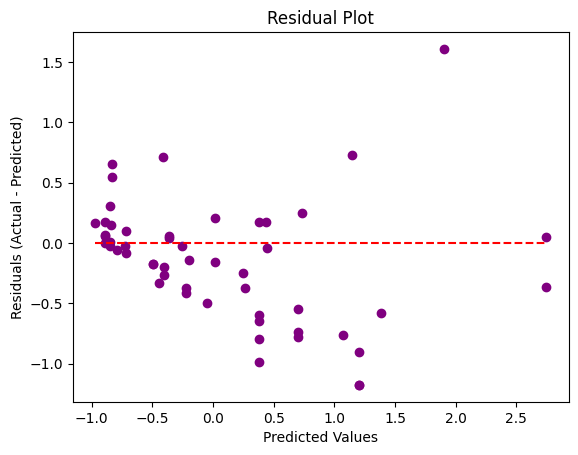

In [22]:
# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, color='purple')

# Add a horizontal line at 0 (perfect fit)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')

# Show the plot
plt.show()

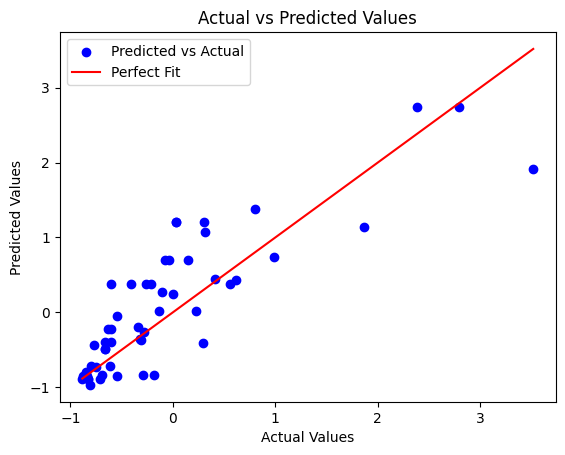

In [23]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plot a reference line (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [24]:
# Model Evaluation
from sklearn import metrics
import numpy as np
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 80.97
Mean Absolute Error: 0.3818118456887444
Mean Square Error: 0.2744356488946893
Root Mean Square Error: 0.5238660600713596


In [25]:
# Calculate the R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.6781155861138866